In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [17]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/alieser/Desktop/Çalışmalar/Fruit vegetable detection/archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [18]:
cnn = tf.keras.models.load_model('trained_model.keras')

Testing on single image

In [10]:
import cv2

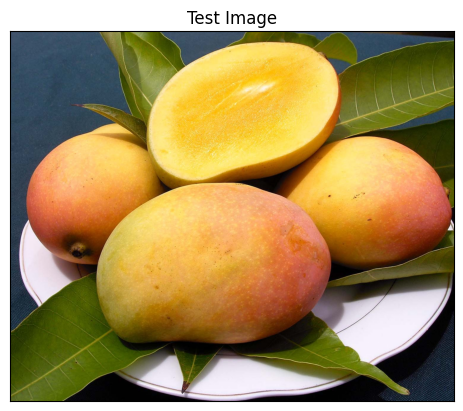

In [19]:
# Reading an image from test data with opencv
img_path ='/Users/alieser/Desktop/Çalışmalar/Fruit vegetable detection/archive/test/mango/Image_2.jpg'

img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  #  converting to RGB

plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Model Testing

In [21]:
image=tf.keras.preprocessing.image.load_img(img_path,target_size=(64,64))
img_array=tf.keras.preprocessing.image.img_to_array(image)
img_array=np.array([img_array])  # Convert single image to a batch
pred=cnn.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [24]:
print(pred)

[[5.4194075e-08 1.2337609e-08 9.5768120e-13 6.2623502e-07 2.0703678e-10
  3.5992098e-10 2.0735134e-10 8.9540766e-09 1.4091989e-07 1.5202822e-10
  4.7892973e-10 6.3383007e-11 1.1267946e-11 6.8351932e-07 1.5749836e-10
  4.8484008e-08 8.2619156e-10 3.0613914e-11 4.2809578e-09 9.9999774e-01
  2.2736622e-11 1.8199501e-09 7.6275791e-11 7.0020882e-08 5.6303366e-09
  3.2459641e-10 1.5074777e-12 1.8206643e-10 5.6159678e-08 1.7636793e-10
  4.1332887e-10 2.3127581e-07 2.9355451e-10 1.3487773e-10 1.2960344e-08
  3.1092580e-07]]


In [25]:
# Return max elements index
result_index=np.argmax(pred)
print(result_index)

19


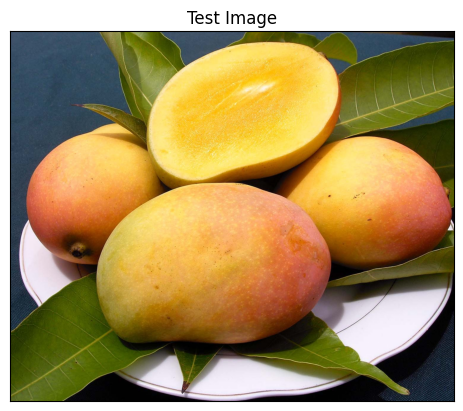

It's a mango


In [27]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))